In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

# Data Loading

In [3]:
#data is loaded in pandas dataframe
data=pd.read_csv('credit.csv')
#head() is used to check data is loaded
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


# Data Cleaning and Preparation

In [4]:
#Replacing unknown values with null
data=data.replace({'unknown': None})

In [5]:
#Checking unique values inorder to replace it with numeric data 
data.savings_balance.unique()

array([None, '< 100 DM', '500 - 1000 DM', '> 1000 DM', '100 - 500 DM'],
      dtype=object)

In [6]:
#mapping categorical numeric values to string values
data['savings_balance']=data.savings_balance.map({'< 100 DM':1,'500 - 1000 DM':2,'>  1000 DM':3,'100 - 500 DM':4 })
data['checking_balance']=data.checking_balance.map({'< 0 DM':1,'1 - 200 DM':2,'> 200 DM':3 })
#Filling null values with mean of its column values
data['savings_balance'] = data['savings_balance'].fillna(np.round(data['savings_balance'].dropna().mean()))
data['checking_balance'] = data['checking_balance'].fillna(np.round(data['checking_balance'].dropna().mean()))

# Data Visualization

**Question 1:**

Check Distribution of data

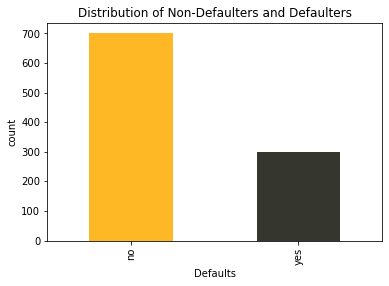

In [7]:
colors = ["#FEB725","#35362E"]
customPalette = sns.set_palette(sns.color_palette(colors))
count=data.default.value_counts()
count.plot(kind='bar',color=("#FEB725","#35362E"))
plt.title("Distribution of Non-Defaulters and Defaulters")
plt.xlabel("Defaults")
plt.ylabel("count");

**Observation:**

Data is not balanced as 70% of data consist of non-defaultors whereas only 30% of data available is of defaultors.

**Question 2:**

Which Age group shoud to be targeted?

Text(0.5, 0, 'Age Group')

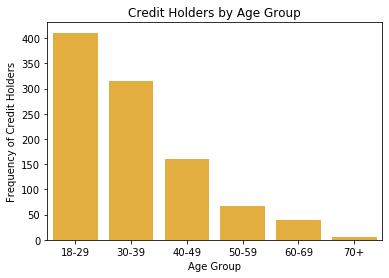

In [8]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ax =sns.countplot(x=pd.cut(data.age, bins, labels = labels,include_lowest = True),data=data,color = "#FEB725")
ax.set_title('Credit Holders by Age Group')
ax.set_ylabel('Frequency of Credit Holders')
ax.set_xlabel('Age Group')

**Observation**

Bar plot illustrate comparison between number of credit holders by age group.

It indicates that approximately 700 customers belong to age group of 18-29 and 30-39 making it about 70% of total credit holders in contrast less than 25 customers belong to age group of 70+. Which show the target age group for business is 18-29 and 30-39.


**Question 3:**

Does checking balance have effect on defaulters?

Text(0.5, 1.0, 'Credit Default Proportion by Checking Balance')

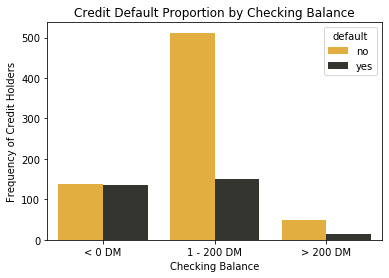

In [9]:
g=sns.countplot(x='checking_balance',data=data,hue='default',palette=customPalette)
g.set_xticklabels(['< 0 DM','1 - 200 DM','> 200 DM'])
g.set_ylabel('Frequency of Credit Holders')
g.set_xlabel('Checking Balance')
g.set_title('Credit Default Proportion by Checking Balance')

**Observation**

Bar plot show frequency of defaulters and non-defaulters by checking balance.

It can be seen that customer with less than 0 DM have equal rate of defaulters and non-defaulters whereas customers with checking balance in between 1-200 DM and greater than 200 DM have more non defaulters than defaulters.


**Question 4:**

what is a major reason for taking credits?

Text(0.5, 1.0, 'Credit Holders by Purpose')

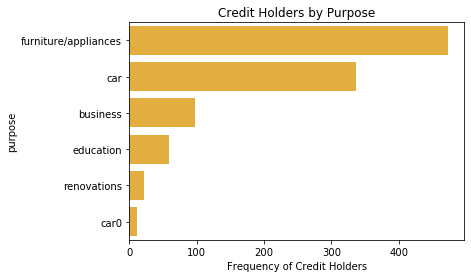

In [10]:
g=sns.countplot(y= data["purpose"], order=data['purpose'].value_counts().index,color = "#FEB725")
g.set_xlabel('Frequency of Credit Holders')
g.set_title('Credit Holders by Purpose')

**Observation**

Bar plot represents comparison between different purposes for which customers took loan.

According to interpretation of graph we can see that most of the customers take lone for the purpose of buying furniture/appliances. More than 70% of customer take loan for furniture/appliances and car whereas least number of people take loan to by old car.

**Question 5:**

Does the past credit history effects being defaulter?


Text(0.5, 1.0, 'Credit Default Proportion by Credit History')

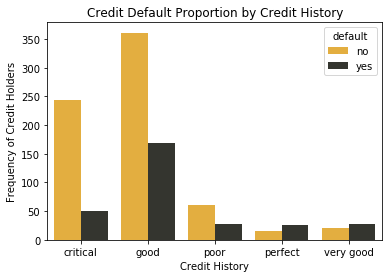

In [11]:
g=sns.countplot(x= data["credit_history"],hue=data['default'])
g.set_ylabel('Frequency of Credit Holders')
g.set_xlabel('Credit History')
g.set_title('Credit Default Proportion by Credit History')

**Observation**

Above bar chart gives information about number of default and no default customers according to their credit history.

According to information customers with an unsatisfactory history of credits such as poor and critical have high proportion in no default category than default contradictory credit holders with decent credit history like perfect and very good have higher proportion in default group than no default group with exception of customers who have credit history as good.


**Question 6:**

Is there any correlation between loan duration and amount?

Text(0.5, 1.0, 'Loan Duration by Amount')

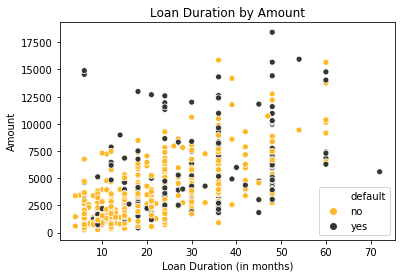

In [12]:
g=sns.scatterplot(data=data, x='months_loan_duration',y='amount', hue='default')
g.set_xlabel('Loan Duration (in months)')
g.set_ylabel('Amount')
g.set_title('Loan Duration by Amount')

**Observation**

Above scatter plot represents correlation between amount and loan duration. 

Plot interprets that there are a smaller number of defaulters if loan duration is less than 20 months and credit amount is less than 5000. As amount and months for loan duration increases number of defaulter increases.


**Question 7:**

Relation between amount and checking balance

Text(0.5, 1.0, 'Credit Default Proportion by Checking Balance and Amount')

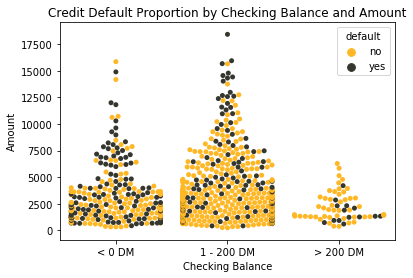

In [13]:
g=sns.swarmplot(x='checking_balance',y='amount', hue='default',data=data)
g.set_ylabel('Amount')
g.set_xlabel('Checking Balance')
g.set_xticklabels(['< 0 DM','1 - 200 DM','> 200 DM'])
g.set_title('Credit Default Proportion by Checking Balance and Amount')

**Observation**

Swarmplot interpreters that customers with checking balance between 1-200 DM and greater than 200 DM have smaller number of credit holders in no default class whereas customers having greater than 0 DM have more credit holders falling in defaulter class. 

# Feature Selection

Machine Learning modelling requires data in numeric format

In [14]:
#encoding data with numeric values
lb=LabelEncoder()
data['housing']=lb.fit_transform(data['housing'])
data['job']=lb.fit_transform(data['job'])
data['other_credit']=lb.fit_transform(data['other_credit'])
data['phone']=lb.fit_transform(data['phone'])
data['employment_duration']=lb.fit_transform(data['employment_duration'])
data['purpose']=lb.fit_transform(data['purpose'])
data['credit_history']=lb.fit_transform(data['credit_history'])
data['default']=lb.fit_transform(data['default'])


Scaling is important factor for avoiding biases.

In [15]:
#Scaling data in range of -1 to 1 to avoid biases 
scaler = StandardScaler()
names = data.drop('default',axis=1).columns
scaled_df = scaler.fit_transform(data.drop('default',axis=1))
scaled_df = pd.DataFrame(scaled_df, columns=names)

Checking correlation between features for feature selection

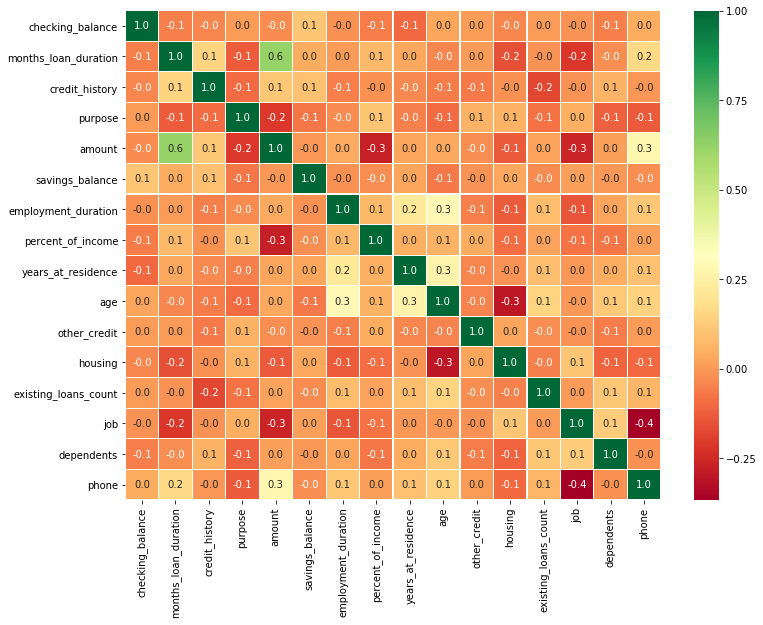

In [16]:
#need to have matplotlib version 3.1.2 as heatmap fitting issue in matplotlib 3.1.1 is solved in newer version
corr=scaled_df.corr()
f,ax = plt.subplots(figsize=(12, 9))
#Using heatmap to easy representation of correlation matrix 
sns.heatmap(corr, annot=True, linewidths=.1, fmt= '.1f',ax=ax,cmap="RdYlGn")
#According to correlation matrix there no features which are showing correlation

In [17]:
#dividing data into dependent and independent variable
X=data.drop('default',axis=1)
y=data['default']

In [18]:
#Using PCA for dimension reduction
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(X)
X = pd.DataFrame(data = principalComponents )

# Model Building

In [19]:
#Splitting data into training and testing dataframes
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
#Using stratified Kfold validation as data is imbalanced and to check for overfitting/underfitting
kfold = StratifiedKFold(n_splits=5, shuffle=True)

## Logistic Regression

In [20]:
#Using cross validation as data is not balanced and to check for overfitting 
#cross validation is used to check how well model is generelizing 
#mean is higher and standard deviation is low model is performing good
logi = LogisticRegression(solver='liblinear')
#cross validation 
scores = cross_val_score(logi, X_train, y_train, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 100))

Accuracy: 73.99 (+/- 2.56)


In [21]:
#Training model 
logiModel=logi.fit(X_train, y_train)
#Trained model used for prediction
y_pred = logiModel.predict(X_test)
#Model evaluation
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % (acc*100))

Accuracy: 72.40


In [22]:
#Confusion matrix for model evaluation
confusion_matrix(y_test, y_pred)

array([[158,  18],
       [ 51,  23]], dtype=int64)

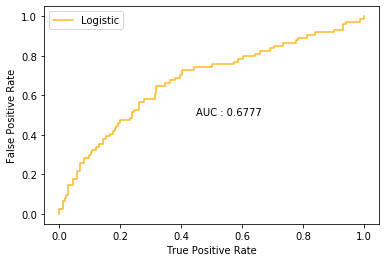

In [23]:
#Building ROC graph for model evaluation
pred=logiModel.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='Logistic')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

## Decision Tree

In [24]:
dTree = tree.DecisionTreeClassifier()
#Performing cross validation
results = cross_val_score(dTree, X_train, y_train, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 100))

Accuracy: 73.99 (+/- 2.56)


In [25]:
#Traing model
dTree = dTree.fit(X_train, y_train)
#Trained model used for prediction
y_pred = dTree.predict(X_test)
#Model evaluation using accuracy 
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % (acc*100))

Accuracy: 62.00


In [26]:
#Model Evaluation using confusion matrix
confusion_matrix(y_test, y_pred)

array([[128,  48],
       [ 47,  27]], dtype=int64)

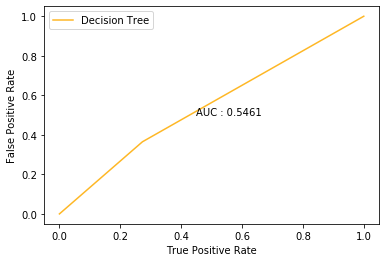

In [27]:
#Model Evaluation using ROC
pred=dTree.predict_proba(X_test)[:,1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='Decision Tree')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

## KNN

In [28]:
knn = KNeighborsClassifier()
#Cross validation
scores = cross_val_score(knn, X_train, y_train, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 100))


Accuracy: 66.81 (+/- 2.20)


In [29]:
#Traning Model
knn_model = knn.fit(X_train, y_train)
#USing trained model for prediction of test data
y_pred = knn_model.predict(X_test)
#Model evaluation using accuracy
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % (acc*100))

Accuracy: 63.60


In [30]:
#Model Evaluation using confusion matrix
confusion_matrix(y_test, y_pred)

array([[145,  31],
       [ 60,  14]], dtype=int64)

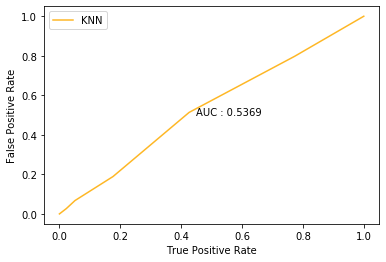

In [31]:
#Model Evaluation using ROC
probas_ = knn_model.predict_proba(X_test)
pred=probas_[:, 1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='KNN')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()


## Random Forest

In [32]:
randForest = RandomForestClassifier()
#Cross Validation
scores = cross_val_score(randForest, X_train, y_train, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 100))

Accuracy: 74.01 (+/- 3.11)


In [33]:
#Training Model
randForest_model = randForest.fit(X_train, y_train)
#Using trained model for predition of test data
y_pred = randForest_model.predict(X_test)
#Model Evaluation by Accuracy
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % (acc*100))

Accuracy: 73.60


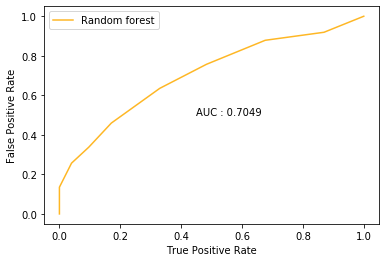

In [34]:
#Model Evaluation by ROC
probas_ =randForest_model.predict_proba(X_test)
pred=probas_[:, 1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='Random forest')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()

# Naive Bayes

In [35]:
model = GaussianNB()
#cross validation
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean()*100, scores.std() * 100))

Cross Validation Accuracy: 73.87 (+/- 1.35)


In [36]:
#Training model
model.fit(X_train, y_train)
# predict the target on the test dataset
y_pred = model.predict(X_test)
# Model Evaluation by Accuracy
acc=accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % (acc*100))

Accuracy: 70.80


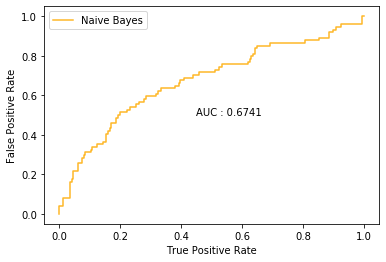

In [37]:
#Model Evaluation by ROC
probas_ =model.predict_proba(X_test)
pred=probas_[:, 1]
auc=roc_auc_score(y_test, pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred)
plt.plot(lr_fpr, lr_tpr, marker='', label='Naive Bayes')
plt.text(0.45, 0.5, 'AUC : '+str(np.round(auc,4)))
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.legend()
plt.show()